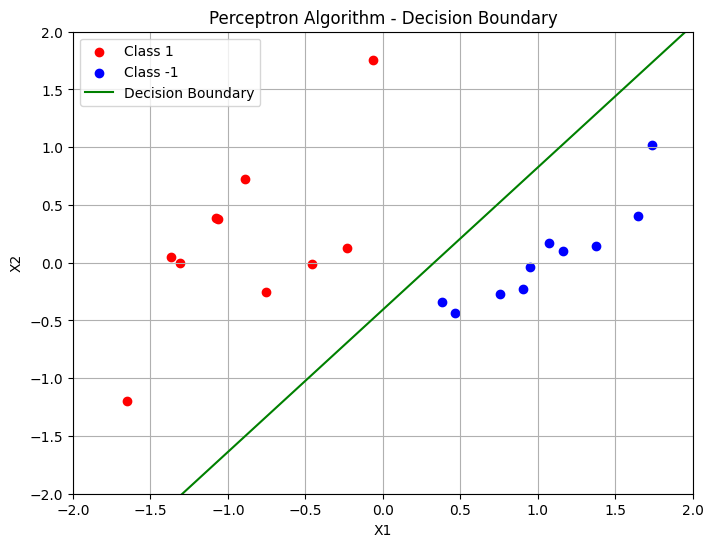

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def predict(w, X):
    #Hàm np.sign trả về giá trị 1 nếu kết quả tích vô hướng là dương và -1 nếu kết quả là âm. Điều này giúp phân loại các điểm dữ liệu vào hai lớp khác nhau.
    return np.sign(X.dot(w))
def perceptron(X, y, w_init):
    w = w_init
    while True:
        pred = predict(w, X)
        # Tìm các điểm phân loại sai
        mis_idxs = np.where(np.equal(pred, y) == False)[0]
        # Số điểm phân loại sai
        num_mis = mis_idxs.shape[0]
        if num_mis == 0: # điều kiện dừng
            return w
        # chọn ngẫu nhiên một trong những điểm phân loại sai
        random_id = np.random.choice(mis_idxs, 1)[0]
        # update w
        w = w + y[random_id]*X[random_id]
# ma trận hiệp phương sai cov và vector kỳ vọng được lưu trong means
means = [[-1, 0], [1, 0]]
cov = [[.3, .2], [.2, .3]]
N = 10
# tạo 10 điểm dữ liệu cho mỗi lớp
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X = np.concatenate((X0, X1), axis = 0)
# ghép nhãn
y = np.concatenate((np.ones(N), -1*np.ones(N)))
# thêm cột bias
Xbar = np.concatenate((np.ones((2*N, 1)), X), axis = 1)
w_init = np.random.randn(Xbar.shape[1])
w = perceptron(Xbar, y, w_init)

# Vẽ các điểm dữ liệu
plt.figure(figsize=(8, 6))
plt.scatter(X0[:, 0], X0[:, 1], color='red', label='Class 1')
plt.scatter(X1[:, 0], X1[:, 1], color='blue', label='Class -1')

# Vẽ đường phân chia (decision boundary)
x_vals = np.linspace(-2, 2, 100)
y_vals = -(w[1]/w[2]) * x_vals - (w[0]/w[2])
plt.plot(x_vals, y_vals, color='green', label='Decision Boundary')

# Thêm nhãn và hiển thị đồ thị
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.title('Perceptron Algorithm - Decision Boundary')
plt.grid(True)
plt.show()